TRAVEL_PACKAGE_PURCHASE_PREDICTION

In [ ]:
#@title Travel Package Purchase Prediction
%%html
<html lang="en">
  <head>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
    <meta name="description" content="Glassmorphism" />
    <meta
      name="keywords"
      content="glassmorphism, UIUX"
    />
    <meta name="author" content="emmaccen" />
    <title>Glass Morphism</title>
    <style>
      html {
        height: 100%;
      }
      body {
        margin: 0;
        padding: 0;
      }

      * {
        box-sizing: border-box;
      }

      .landingContainer {
        /* span the entire desktop height : height: 100vh;*/
        height: 100%;
        font-family: consolas !important;
        /* set a gradient background with 3 colours https://coolors.co/ */
        background: linear-gradient(
          to right,
          #280b53,
          #65156e,
          #9f2a63,
          #d44842
        );
        display: flex;
        flex-direction: column;
        align-items: center;
        justify-content: space-around;
      }

      .centered {
        /* center content */
        display: flex;
        flex-direction: column;
        justify-content: center;
        align-items: center;
        /* so it takes up its containers height (landingContainer)*/
        height: inherit;
      }

      h1.title {
        color: whitesmoke;
        font-family: georgia;
        /* cover the entire page width : font-size: 10vw;*/
        font-size: 6vw;
        text-align: center;
        margin-bottom: 0;
        margin-top: 20px;
      }

      h2.title {
        color: whitesmoke;
        font-family: consolas;
        /* cover the entire page width : font-size: 10vw;*/
        font-size: 1.5vw;
        margin-bottom: 16px;
        margin-top: 0;
        margin-left: 0;
      }
      /* The real deal  starts here*/
      .glassContainer {
        position: absolute;
        /* center content */
        display: flex;
        justify-content: center;
        align-items: center;
        top: 0;
        width: 100%;
        height: 100%;
      }
      .cover {
        transition: 0.5s all ease;
        height: 70%;
        width: 70%;
        background-color: rgba(255, 255, 255, 0.25);
        /* box-shadow: none|h-offset v-offset blur spread color |inset|initial|inherit; */
        box-shadow: 0 8px 32px 0 rgba(31, 38, 135, 0.37);
        /* For the fog-like glass effect */
        backdrop-filter: blur(4px);
        -webkit-backdrop-filter: blur(4px);
        border-radius: 10px;
      }

      /* responsiveness */

      @media (max-width: 700px) {
        .cover {
          height: 30%;
        }
      }
    </style>
  </head>
  <body>
    <div class="landingContainer">
      <div class="centered">
        <h1 class="title">Travel Package Purchase Prediction</h1>
        <h2 class="title">Riya Shukla. Sahil Goyal. Sameer Khatwani</h2>
      </div>
    </div>
  </body>
</html>

In [ ]:
# @title  Settings for style
# Set the style and figuresize for further plots
import seaborn as sns

sns.set(rc={
    'axes.facecolor': '#232323',  # Change this to your desired color
    'figure.facecolor': '#454545',  # Change this to your desired color
    'figure.figsize': (12, 9),
    'text.color': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.labelcolor': 'white',
})

In [ ]:
custom_colors = ['#E50058','#FF740F']
sns.set_palette(custom_colors)

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

def custom_color_scale(data, color1, color2):
    data_min = data.min()
    data_max = data.max()
    color_scale = [f'rgb({int((1 - (value - data_min) / (data_max - data_min)) * int(color1[1:3], 16) + (value - data_min) / (data_max - data_min) * int(color2[1:3], 16))}, ' +
                  f'{int((1 - (value - data_min) / (data_max - data_min)) * int(color1[3:5], 16) + (value - data_min) / (data_max - data_min) * int(color2[3:5], 16))}, ' +
                  f'{int((1 - (value - data_min) / (data_max - data_min)) * int(color1[5:7], 16) + (value - data_min) / (data_max - data_min) * int(color2[5:7], 16))}'
                  for value in data]
    return color_scale


Style settings

In [ ]:
# histogram and boxplot for the feature
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="orange"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="Winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="blue", linestyle="-")
    plt.show()  # show the plot

# labeled_barplot
def labeled_barplot(data, feature, perc=False, v_ticks=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    if v_ticks is True:
        plt.xticks(rotation=90)

    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot

# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


# **Introduction**

### In the dynamic realm of travel, predictive analytics has emerged as a game-changer, revolutionizing how we plan vacations. By harnessing data and artificial intelligence, it enables personalized travel package predictions, assisting travelers in making informed choices and allowing travel agencies to tailor packages to individual preferences. This data-driven approach transforms the travel experience, from flight and accommodation bookings to dining and excursions, ensuring each journey is uniquely memorable and hassle-free.

# **Dataset Description**

* CustomerID : Unique customer ID
* ProdTaken : Product taken or not (0: No, 1: Yes)
* Age : Age of customer
* TypeofContact : How customer was contacted (Company Invited or Self Inquiry)
* CityTier : City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e.
* DurationOfPitch : Duration of the pitch by a salesperson to the customer
* Occupation : Occupation of customer
* Gender : Gender of customer
* NumberOfPersonVisiting : Total number of persons planning to take the trip with the customer
* NumberOfFollowups : Total number of follow-ups has been done by the salesperson after the sales pitch
* ProductPitched: Product pitched by the salesperson
* PreferredPropertyStar : Preferred hotel property rating by customer
* MaritalStatus : Marital status of customer
* NumberOfTrips : Average number of trips in a year by customer
* Passport : The customer has a passport or not (0: No, 1: Yes)
* PitchSatisfactionScore : Sales pitch satisfaction score
* OwnCar : Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting : Total number of children with age less than 5
* planning to take the trip with the customer
* Designation : Designation of the customer in the current organization
* MonthlyIncome : Gross monthly income of the customer

## Importing All The Neccessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import  r2_score

# **Reading and Understanding the Data**

In [ ]:
# reading the dataset.
df_travel= pd.read_csv('/content/Tourismfe (3).csv')

# Creating a copy of the dataset.
df=df_travel.copy()

# Viewing the first five rows of the dataset.
df.head()

,CustomerID,ProdTaken,Age,Company Invited,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,insurance,TypeofContact
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,Single,1.0,1,2,1,0.0,Manager,20993.0,1,Self Enquiry
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,Divorced,2.0,0,3,1,2.0,Manager,20130.0,0,Company Invited
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,Single,7.0,1,3,0,0.0,Executive,17090.0,1,Self Enquiry
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,Divorced,2.0,1,5,1,1.0,Executive,17909.0,0,Company Invited
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,Divorced,1.0,0,5,1,0.0,Executive,18468.0,0,Self Enquiry


## Understanding The Dataset

In [ ]:
#get the size of dataframe
print ("Rows     : " , df.shape[0])  # number of rows/observations
print ("Columns  : " , df.shape[1]) # number of columns
print ("#"*40,"\n","Features : \n\n", df.columns.tolist()) #For the name of columns/features
print ("#"*40,"\nMissing values :\n\n", df.isnull().sum().sort_values(ascending=False))


Rows     :  4888
Columns  :  22
######################################## 
 Features : 

 ['CustomerID', 'ProdTaken', 'Age', 'Company Invited', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome', 'insurance', 'TypeofContact']
######################################## 
Missing values :

 DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Company Invited              25
NumberOfPersonVisiting        0
Gender                        0
ProductPitched                0
ProdTaken                     0
MaritalStatus                 0
Occupation                    0

In [ ]:
#@title Insight
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #eed863; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #d80e97;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Insight</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 10px;">1.</td>
				<td style="font-family: consolas; padding: 10px;">
					There are in total 9 columns with missing values.
				</td>
			</tr>
		</tbody>
	</table>
</div>


S.No,Insight
1.,There are in total 9 columns with missing values.


## Remove Company Invited as CompanyInvited and TypeOfContact are same

In [ ]:
# Dropping the column of company invited.
del df['Company Invited']

In [ ]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome', 'insurance',
       'TypeofContact'],
      dtype='object')

## Data Type of the columns for the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

In [ ]:
#@title Insight
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #eed863; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #d80e97;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Insight</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 10px;">1.</td>
				<td style="font-family: consolas; padding: 10px;">
					There are total 21 columns and 4,888 observations in the dataset.
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; padding: 10px;">1.</td>
				<td style="font-family: consolas; padding: 10px;">
					We can see that 8 columns have less than 4,888 non-null values i.e. columns have missing values
				</td>
			</tr>
		</tbody>
	</table>
</div>


S.No,Insight
1.,"There are total 21 columns and 4,888 observations in the dataset."
1.,"We can see that 8 columns have less than 4,888 non-null values i.e. columns have missing values"


## Descriptive Statistics

In [ ]:
# statistics of numerical columns
df.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


These inferences provide a summary of the central tendency, variability, and range of the data for each variable .



*   Minimum age of customer is 18 and Maximum age is 61 with mean 38 and median 36.
*   Mean Duration of pitch is 15 mins to max of 127 mins.

*   Mean Number of trips is 3 with maximum of 22.
*   Average monthly income of customer is 23619 with maximum of 98678.






In [ ]:
# statistics of categorical columns
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842
TypeofContact,4863,2,Self Enquiry,3444




*   Salaried appears 2,368 times in the dataset, maximum customers were salaried.
*   "Male" appears 2,916 times in the dataset, male is the most frequent gender

*    "Basic" is pitched 1,842 times, making it the most frequently pitched product.


*   "Self Enquiry" is the type of contact for 3,444 entries as a result of which it was









In [ ]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,insurance
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000,4888.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491,0.423486
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361,0.494161
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,0.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000,0.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000,0.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000,1.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000,1.000000


Observations

* **Minimum age** of customer is 18 and Maximum age is 61 with mean of 38.
* **Mean Duration of pitch** is **15 mins** to **max of 127 mins**.
* **Mean Number of trips is 3** with **maximum of 22**.This needs to be verified
* **Average annual income** of customer is **1,150,532** with maximum of 4,200,000.
* 920 customer had taken package last time.








# **Data Pre-processing**

In [ ]:
#@title Data Processing
%%html
<html lang="en">
  <head>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
    <meta name="description" content="Glassmorphism" />
    <meta
      name="keywords"
      content="glassmorphism, UIUX"
    />
    <meta name="author" content="emmaccen" />
    <title>Glass Morphism</title>
    <style>
      html {
        height: 100%;
      }
      body {
        margin: 0;
        padding: 0;
      }

      * {
        box-sizing: border-box;
      }

      .landingContainer {
        /* span the entire desktop height : height: 100vh;*/
        height: 100%;
        font-family: consolas !important;
        /* set a gradient background with 3 colours https://coolors.co/ */
        background: linear-gradient(
          to right,
          #280b53,
          #65156e,
          #9f2a63,
          #d44842
        );
        display: flex;
        flex-direction: column;
        align-items: center;
        justify-content: space-around;
      }

      .centered {
        /* center content */
        display: flex;
        flex-direction: column;
        justify-content: center;
        align-items: center;
        /* so it takes up its containers height (landingContainer)*/
        height: inherit;
      }

      h1.title {
        color: whitesmoke;
        font-family: georgia;
        /* cover the entire page width : font-size: 10vw;*/
        font-size: 6vw;
        text-align: center;
        margin-bottom: 0;
        margin-top: 20px;
      }

      h2.title {
        color: whitesmoke;
        font-family: consolas;
        /* cover the entire page width : font-size: 10vw;*/
        font-size: 1.5vw;
        margin-bottom: 16px;
        margin-top: 0;
        margin-left: 0;
      }
      /* The real deal  starts here*/
      .glassContainer {
        position: absolute;
        /* center content */
        display: flex;
        justify-content: center;
        align-items: center;
        top: 0;
        width: 100%;
        height: 100%;
      }
      .cover {
        transition: 0.5s all ease;
        height: 70%;
        width: 70%;
        background-color: rgba(255, 255, 255, 0.25);
        /* box-shadow: none|h-offset v-offset blur spread color |inset|initial|inherit; */
        box-shadow: 0 8px 32px 0 rgba(31, 38, 135, 0.37);
        /* For the fog-like glass effect */
        backdrop-filter: blur(4px);
        -webkit-backdrop-filter: blur(4px);
        border-radius: 10px;
      }

      /* responsiveness */

      @media (max-width: 700px) {
        .cover {
          height: 30%;
        }
      }
    </style>
  </head>
  <body>
    <div class="landingContainer">
      <div class="centered">
        <h1 class="title">Data Processing</h1>
        <h2 class="title">Section 1</h2>
      </div>
    </div>
  </body>
</html>

## Analysing Null Values

In [ ]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
insurance                     0
TypeofContact                25
dtype: int64

In [ ]:
cat_cols=['ProdTaken','CityTier','Occupation','Gender','NumberOfPersonVisiting','NumberOfFollowups','ProductPitched','PreferredPropertyStar','MaritalStatus','NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','Designation']

for column in cat_cols:
    print(df[column].value_counts())
    print('-'*30)

0    3968
1     920
Name: ProdTaken, dtype: int64
------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
------------------------------
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
------------------------------
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64
------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------------------------
3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64
------------------------------
Married      2340
Divorc

In [ ]:
#@title Insight
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Insight</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					Gender Distribution has an error ,as it is considering Fe male as unique value.
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					In maratial status single and unmarried are occuring which are of same meaning.
				</td>
			</tr>
		</tbody>
	</table>
</div>


S.No,Insight
1.,"Gender Distribution has an error ,as it is considering Fe male as unique value."
1.,In maratial status single and unmarried are occuring which are of same meaning.


# **Rectification in Gender**




In [ ]:
df["Gender"] = df["Gender"].str.replace("Fe Male","Female")
print(df["Gender"].value_counts())

Male      2916
Female    1972
Name: Gender, dtype: int64


# **Rectification for Marital status**

In [ ]:
df["MaritalStatus"] = df["MaritalStatus"].str.replace("Unmarried","Single")
print(df["MaritalStatus"].value_counts())

Married     2340
Single      1598
Divorced     950
Name: MaritalStatus, dtype: int64


**Observation :**


*   Corrections made in Gender and MaritalStatus .




# **Unique values in each column**

In [ ]:
df.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         2
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  3
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
insurance                      2
TypeofContact                  2
dtype: int64

Observation :

* Most of the variables are categorical except - Age, duration of pitch, monthly income and number of trips of customers.

# Check For Unique Values Counts for each element, in Each Column

In [ ]:
for i in cat_cols:
    print('Unique values in',i, 'are :')
    print(df[i].value_counts())
    print('*'*50)

Unique values in ProdTaken are :
0    3968
1     920
Name: ProdTaken, dtype: int64
**************************************************
Unique values in CityTier are :
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male      2916
Female    1972
Name: Gender, dtype: int64
**************************************************
Unique values in NumberOfPersonVisiting are :
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
**************************************************
Unique values in NumberOfFollowups are :
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64
*************************************

# Dealing with Null Values





### **Target 1** : AGE

***Logic* : Imputing missing values with average age of the customers.**

In [ ]:
mean_age=df['Age'].mean()
mean_age

37.62226512226512

In [ ]:
#Round off the age as, the age cannot be a floating number.
round_age=np.round(mean_age)
round_age

38.0

In [ ]:
#Imputing missing values of Age variable with round  of mean age value.
df['Age']=df['Age'].fillna(round_age)


In [ ]:
# Check for missing values
df['Age'].isna().sum()

0

### **Target 2** : Number of Children Visiting

***Logic*** : *Sorting the dataset with respect to Maritial Status and then Imputing the Number of Children Visiting using KNN*

In [ ]:
# Checking whether the number of Children visiting is 0 if the marital status is single
df[['NumberOfChildrenVisiting','MaritalStatus']][df['MaritalStatus']=='Single'].value_counts()

NumberOfChildrenVisiting  MaritalStatus
1.0                       Single           693
2.0                       Single           431
0.0                       Single           358
3.0                       Single            96
dtype: int64

In [ ]:
df = df.sort_values(by=['MaritalStatus'])

In [ ]:
df['MaritalStatus'].unique()

array(['Divorced', 'Married', 'Single'], dtype=object)

In [ ]:
df['MaritalStatus']

3497    Divorced
3431    Divorced
3433    Divorced
3434    Divorced
3435    Divorced
          ...   
2458      Single
2463      Single
2465      Single
2467      Single
4887      Single
Name: MaritalStatus, Length: 4888, dtype: object

KNN Imputation

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
df['NumberOfChildrenVisiting'] = imputer.fit_transform(df[['NumberOfChildrenVisiting']])

In [ ]:
df['NumberOfChildrenVisiting'].isnull().sum()

0

Again , we sorted the data using index values .

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,insurance,TypeofContact
0,200000,1,41.0,3,6.0,Salaried,Female,3,3.0,Deluxe,...,Single,1.0,1,2,1,0.0,Manager,20993.0,1,Self Enquiry
1,200001,0,49.0,1,14.0,Salaried,Male,3,4.0,Deluxe,...,Divorced,2.0,0,3,1,2.0,Manager,20130.0,0,Company Invited
2,200002,1,37.0,1,8.0,Free Lancer,Male,3,4.0,Basic,...,Single,7.0,1,3,0,0.0,Executive,17090.0,1,Self Enquiry
3,200003,0,33.0,1,9.0,Salaried,Female,2,3.0,Basic,...,Divorced,2.0,1,5,1,1.0,Executive,17909.0,0,Company Invited
4,200004,0,38.0,1,8.0,Small Business,Male,2,3.0,Basic,...,Divorced,1.0,0,5,1,0.0,Executive,18468.0,0,Self Enquiry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,3,9.0,Small Business,Male,3,5.0,Deluxe,...,Single,2.0,1,1,1,1.0,Manager,26576.0,1,Self Enquiry
4884,204884,1,28.0,1,31.0,Salaried,Male,4,5.0,Basic,...,Single,3.0,1,3,1,2.0,Executive,21212.0,1,Company Invited
4885,204885,1,52.0,3,17.0,Salaried,Female,4,4.0,Standard,...,Married,7.0,0,1,1,3.0,Senior Manager,31820.0,1,Self Enquiry
4886,204886,1,19.0,3,16.0,Small Business,Male,3,4.0,Basic,...,Single,3.0,0,5,0,2.0,Executive,20289.0,1,Self Enquiry


### **Target 3** : NumberOfTrips





***LOGIC*** :

If the Product Taken is 0, we can conclude that the Number of trips will also be 0, because the customer didnt take the product from the company in the past , then how he will be going for trips.

In [ ]:
df['NumberOfTrips'][df['ProdTaken']==0].isna().sum()

128

In [ ]:
df['NumberOfTrips'][df['ProdTaken']==0] = df['NumberOfTrips'][df['ProdTaken']==0].fillna(0)

<ipython-input-38-e9c1003d37ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NumberOfTrips'][df['ProdTaken']==0] = df['NumberOfTrips'][df['ProdTaken']==0].fillna(0)


In [ ]:
df['NumberOfTrips'].isna().sum()

12

According to the above logic we were able to impute most of the missing values and now only 12 data points are left behind as null values. So, here we use median to fill the null values

In [ ]:
# Using median to fill the remaining 12 values
d = df['NumberOfTrips'].value_counts().to_dict()
d_array = np.array(list(d))
med = np.median(d_array)

df['NumberOfTrips'].fillna(med,inplace=True)

In [ ]:
df['NumberOfTrips'].isna().sum()

0

### **Target 4** : Type Of Contact


***LOGIC*** : Filling the Null values with MODE or Mostly occuring value

In [ ]:
df['TypeofContact'].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

In [ ]:
df['TypeofContact'].fillna('Self Enquiry',inplace=True)

**Still Left With !!**

In [ ]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome               233
insurance                     0
TypeofContact                 0
dtype: int64

### **Target 5** : Monthly Income

***Logic*** : Mapping the relationship between Monthly Income and Designation of the Customer and filling the null values with respect to it.

In [ ]:
df['Designation'].value_counts()

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

As Numpy (np.median) accepts only numpy array so, we we will convert it to dictionary then to list then to array and then median.

In [ ]:
d_list = df['Designation'].value_counts().to_dict().keys()
for x in list(d_list):
  null_v = df['MonthlyIncome'][df['Designation']==x].isna().sum()
  print(f"Null Value of {x} : {null_v} ")

Null Value of Executive : 87 
Null Value of Manager : 146 
Null Value of Senior Manager : 0 
Null Value of AVP : 0 
Null Value of VP : 0 


Here we were able to find out that only **"Executive"** and **"Manager"** have Null Values.

Filling the Null values with Mean with respect to the Designation

* Executive

In [ ]:
executive_mean = df['MonthlyIncome'][df['Designation']=='Executive'].mean().round()
executive_mean

19940.0

In [ ]:
df['MonthlyIncome'][df['Designation']=='Executive'] = df['MonthlyIncome'][df['Designation']=='Executive'].fillna(executive_mean)

<ipython-input-48-299b9d0ae723>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MonthlyIncome'][df['Designation']=='Executive'] = df['MonthlyIncome'][df['Designation']=='Executive'].fillna(executive_mean)


* For Manager

In [ ]:
manager_mean = df['MonthlyIncome'][df['Designation']=='Manager'].mean().round()
manager_mean

22643.0

In [ ]:
df['MonthlyIncome'][df['Designation']=='Manager'] = df['MonthlyIncome'][df['Designation']=='Manager'].fillna(manager_mean)

<ipython-input-50-e81a66aacfe6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MonthlyIncome'][df['Designation']=='Manager'] = df['MonthlyIncome'][df['Designation']=='Manager'].fillna(manager_mean)


In [ ]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome                 0
insurance                     0
TypeofContact                 0
dtype: int64

#### **Addition of a New Column Budget in the Dataframe**

In [ ]:
df['Budget']= df['MonthlyIncome'] * 0.3

Note : After Imputing the null values for Monthly income, we also added a new column called "BUDGET"


**LOGIC** :   **50/30/20 rule**

What is that rule ?
ule helps individuals allocate their income in a balanced way.

50% for needs:  This category includes essential expenses such as housing, utilities, groceries, transportation, and other necessary bills.

**30% for wants:** This category covers discretionary spending on non-essential items such as entertainment, dining out, vacations, and hobbies.

**20% for savings and debt repayment:** This category is dedicated to saving for financial goals, such as emergencies like situation.


In [ ]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome                 0
insurance                     0
TypeofContact                 0
Budget                        0
dtype: int64

### **Target 6** : Preferred Property Star


***LOGIC*** :  Filling the null values of Preferred Property Star with respect to the Mean of respective Designation

In [ ]:
df['PreferredPropertyStar'][df['Designation']=='Executive'].value_counts()


3.0    1118
4.0     368
5.0     355
Name: PreferredPropertyStar, dtype: int64

In [ ]:
df['PreferredPropertyStar'][df['Designation']=='Manager'].value_counts()

3.0    1090
5.0     329
4.0     312
Name: PreferredPropertyStar, dtype: int64

In [ ]:
df['PreferredPropertyStar'][df['Designation']=='Senior Manager'].value_counts()

3.0    436
5.0    175
4.0    130
Name: PreferredPropertyStar, dtype: int64

In [ ]:
df['PreferredPropertyStar'][df['Designation']=='AVP'].value_counts()

3.0    212
5.0     68
4.0     62
Name: PreferredPropertyStar, dtype: int64

In [ ]:
df['PreferredPropertyStar'][df['Designation']=='VP'].value_counts()

3.0    137
4.0     41
5.0     29
Name: PreferredPropertyStar, dtype: int64

Here, it is found that, people of all designation preferred 3.0 star. So, we impute the Null value with 3.0


In [ ]:
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(3.0)

In [ ]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome                 0
insurance                     0
TypeofContact                 0
Budget                        0
dtype: int64

# **Target 7** : Number of Followups

***Logic*** : Number of Followups is imputed with respect to the Product Pitched

In [ ]:
df['ProductPitched'].value_counts()

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

In [ ]:
df['NumberOfFollowups'][df['ProductPitched']=='King'].isna().sum()

0

In [ ]:
df['NumberOfFollowups'][df['ProductPitched']=='Super Deluxe'].isna().sum()

0

In [ ]:
df['NumberOfFollowups'][df['ProductPitched']=='Standard'].isna().sum()

0

Only null values were found where the product pitched were Deluxe and Basic.

In [ ]:
df['NumberOfFollowups'][df['ProductPitched']=='Deluxe'].isna().sum()

32

In [ ]:
df['NumberOfFollowups'][df['ProductPitched']=='Deluxe'].value_counts()

4.0    724
3.0    509
5.0    263
2.0     86
1.0     65
6.0     53
Name: NumberOfFollowups, dtype: int64

Here, it is clearly know that when the product pitched is deluxe the null value occurs, so we imputed it with mean value of "Deluxe"

In [ ]:
dict1 = df['NumberOfFollowups'][df['ProductPitched']=='Deluxe'].mean().round()
dict1

4.0

For Basic

In [ ]:
df['NumberOfFollowups'][df['ProductPitched']=='Basic'].isna().sum()

13

Similarly, we impute the null values of Number of followups when the product pitched is basic with the mean value of it.

In [ ]:
df['NumberOfFollowups'][df['ProductPitched']=='Basic'].value_counts()

4.0    767
3.0    556
5.0    288
2.0     92
1.0     72
6.0     54
Name: NumberOfFollowups, dtype: int64

In [ ]:
dict1 = df['NumberOfFollowups'][df['ProductPitched']=='Basic'].mean().round()
dict1

4.0

Fillna for both deluxe as well as Basic

In [ ]:

df['NumberOfFollowups'].fillna(4,inplace=True)

In [ ]:
df['NumberOfFollowups'].isna().sum()

0

In [ ]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome                 0
insurance                     0
TypeofContact                 0
Budget                        0
dtype: int64

###**Target 8**: DurationOfPitch

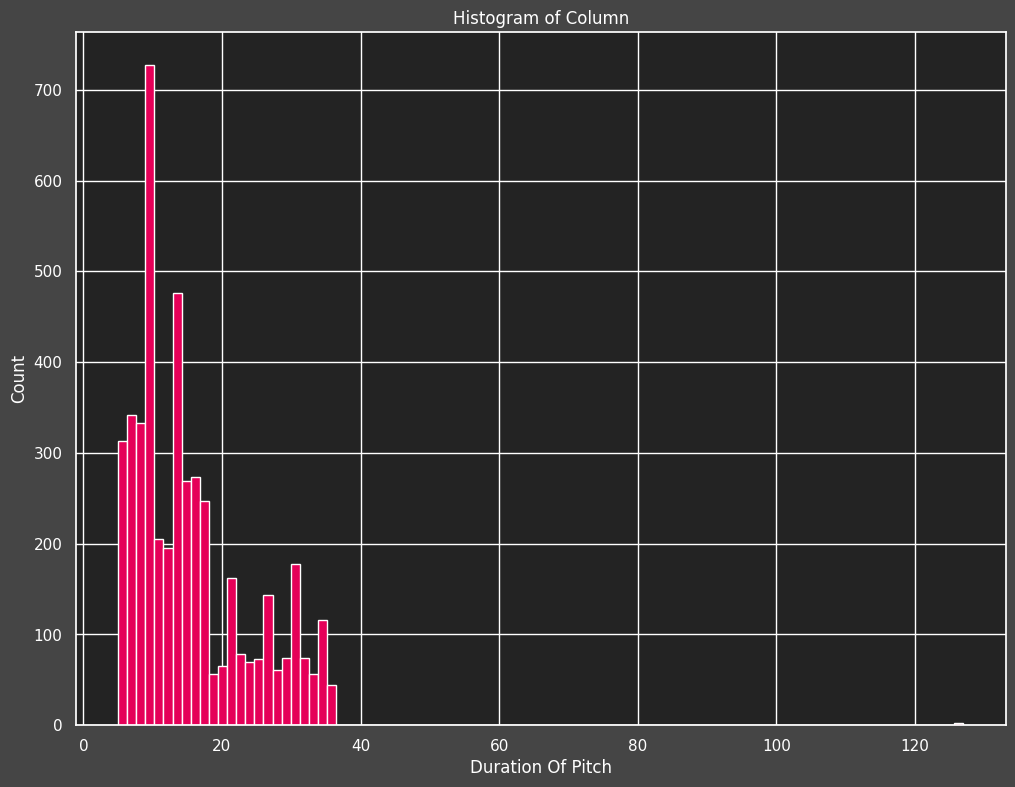

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(df['DurationOfPitch'], bins='auto')
plt.xlabel('Duration Of Pitch')
plt.ylabel('Count')
plt.title('Histogram of Column')
plt.show()


In [ ]:
#@title Observation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #eed863; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #d80e97;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Insight</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 10px;">1.</td>
				<td style="font-family: consolas; padding: 10px;">
					The graph was positively skewed ,So we sorted the product pitched column and the applied KNN imputation on it .
				</td>
			</tr>
		</tbody>
	</table>
</div>


S.No,Insight
1.,"The graph was positively skewed ,So we sorted the product pitched column and the applied KNN imputation on it ."


The graph was positively skewed ,So we sorted the product pitched column and the applied KNN imputation on it .

In [ ]:
df.sort_values(by=['ProductPitched'],inplace=True)
df

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,insurance,TypeofContact,Budget
2443,202443,1,35.0,1,13.0,Salaried,Male,3,3.0,Basic,...,2.0,1,3,1,1.000000,Executive,20363.0,1,Self Enquiry,6108.9
2480,202480,1,51.0,3,10.0,Small Business,Male,3,5.0,Basic,...,3.0,1,4,0,1.000000,Executive,21361.0,1,Self Enquiry,6408.3
2481,202481,0,36.0,3,9.0,Small Business,Female,4,4.0,Basic,...,3.0,0,2,1,1.000000,Executive,20692.0,0,Self Enquiry,6207.6
2482,202482,0,37.0,1,12.0,Salaried,Female,3,5.0,Basic,...,2.0,1,2,1,1.000000,Executive,98678.0,0,Self Enquiry,29603.4
2484,202484,0,36.0,1,11.0,Salaried,Male,4,4.0,Basic,...,3.0,0,4,0,1.000000,Executive,20629.0,0,Self Enquiry,6188.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,203282,1,43.0,3,19.0,Salaried,Male,3,4.0,Super Deluxe,...,2.0,1,5,1,2.000000,AVP,32436.0,1,Company Invited,9730.8
4315,204315,0,57.0,3,13.0,Salaried,Female,3,2.0,Super Deluxe,...,2.0,0,3,1,1.000000,AVP,31890.0,1,Company Invited,9567.0
3712,203712,0,54.0,1,7.0,Small Business,Female,3,5.0,Super Deluxe,...,6.0,1,1,0,1.000000,AVP,31643.0,1,Company Invited,9492.9
4322,204322,0,53.0,1,11.0,Salaried,Female,2,4.0,Super Deluxe,...,4.0,0,5,1,1.187267,AVP,35233.0,1,Self Enquiry,10569.9


As tha Duration of pitch was not normally distributed so mean imputation not favourable.

**KNN - Imputation**

In [ ]:
imputer = KNNImputer(n_neighbors=3)
df['DurationOfPitch'] = imputer.fit_transform(df[['DurationOfPitch']])

In [ ]:
df.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
insurance                   0
TypeofContact               0
Budget                      0
dtype: int64

In [ ]:
df

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,insurance,TypeofContact,Budget
2443,202443,1,35.0,1,13.0,Salaried,Male,3,3.0,Basic,...,2.0,1,3,1,1.000000,Executive,20363.0,1,Self Enquiry,6108.9
2480,202480,1,51.0,3,10.0,Small Business,Male,3,5.0,Basic,...,3.0,1,4,0,1.000000,Executive,21361.0,1,Self Enquiry,6408.3
2481,202481,0,36.0,3,9.0,Small Business,Female,4,4.0,Basic,...,3.0,0,2,1,1.000000,Executive,20692.0,0,Self Enquiry,6207.6
2482,202482,0,37.0,1,12.0,Salaried,Female,3,5.0,Basic,...,2.0,1,2,1,1.000000,Executive,98678.0,0,Self Enquiry,29603.4
2484,202484,0,36.0,1,11.0,Salaried,Male,4,4.0,Basic,...,3.0,0,4,0,1.000000,Executive,20629.0,0,Self Enquiry,6188.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,203282,1,43.0,3,19.0,Salaried,Male,3,4.0,Super Deluxe,...,2.0,1,5,1,2.000000,AVP,32436.0,1,Company Invited,9730.8
4315,204315,0,57.0,3,13.0,Salaried,Female,3,2.0,Super Deluxe,...,2.0,0,3,1,1.000000,AVP,31890.0,1,Company Invited,9567.0
3712,203712,0,54.0,1,7.0,Small Business,Female,3,5.0,Super Deluxe,...,6.0,1,1,0,1.000000,AVP,31643.0,1,Company Invited,9492.9
4322,204322,0,53.0,1,11.0,Salaried,Female,2,4.0,Super Deluxe,...,4.0,0,5,1,1.187267,AVP,35233.0,1,Self Enquiry,10569.9


# **Exploratory Data Analysis**

In [ ]:
#@title Exploring the data
%%html
<html lang="en">
  <head>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
    <meta name="description" content="Glassmorphism" />
    <meta
      name="keywords"
      content="glassmorphism, UIUX"
    />
    <meta name="author" content="emmaccen" />
    <title>Glass Morphism</title>
    <style>
      html {
        height: 100%;
      }
      body {
        margin: 0;
        padding: 0;
      }

      * {
        box-sizing: border-box;
      }

      .landingContainer {
        /* span the entire desktop height : height: 100vh;*/
        height: 100%;
        font-family: consolas !important;
        /* set a gradient background with 3 colours https://coolors.co/ */
        background: linear-gradient(
          to right,
          #280b53,
          #65156e,
          #9f2a63,
          #d44842
        );
        display: flex;
        flex-direction: column;
        align-items: center;
        justify-content: space-around;
      }

      .centered {
        /* center content */
        display: flex;
        flex-direction: column;
        justify-content: center;
        align-items: center;
        /* so it takes up its containers height (landingContainer)*/
        height: inherit;
      }

      h1.title {
        color: whitesmoke;
        font-family: georgia;
        /* cover the entire page width : font-size: 10vw;*/
        font-size: 6vw;
        text-align: center;
        margin-bottom: 0;
        margin-top: 20px;
      }

      h2.title {
        color: whitesmoke;
        font-family: consolas;
        /* cover the entire page width : font-size: 10vw;*/
        font-size: 1.5vw;
        margin-bottom: 16px;
        margin-top: 0;
        margin-left: 0;
      }
      /* The real deal  starts here*/
      .glassContainer {
        position: absolute;
        /* center content */
        display: flex;
        justify-content: center;
        align-items: center;
        top: 0;
        width: 100%;
        height: 100%;
      }
      .cover {
        transition: 0.5s all ease;
        height: 70%;
        width: 70%;
        background-color: rgba(255, 255, 255, 0.25);
        /* box-shadow: none|h-offset v-offset blur spread color |inset|initial|inherit; */
        box-shadow: 0 8px 32px 0 rgba(31, 38, 135, 0.37);
        /* For the fog-like glass effect */
        backdrop-filter: blur(4px);
        -webkit-backdrop-filter: blur(4px);
        border-radius: 10px;
      }

      /* responsiveness */

      @media (max-width: 700px) {
        .cover {
          height: 30%;
        }
      }
    </style>
  </head>
  <body>
    <div class="landingContainer">
      <div class="centered">
        <h1 class="title">Exploratory Data Analysis</h1>
        <h2 class="title">Section 2</h2>
      </div>
    </div>
  </body>
</html>

#**Visualization of the Dataset**

## *The Visualization Process Includes* :
- [Univariate Analysis](#univariate-analysis)
- [Bivariate Analysis](#bivariate-analysis)
- [Distribution of Data](#distribution-of-data)
- [Correlation Heatmap](#correlation-heatmap)

## Correlation heatmap

<ipython-input-81-5f8de7dc83f5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


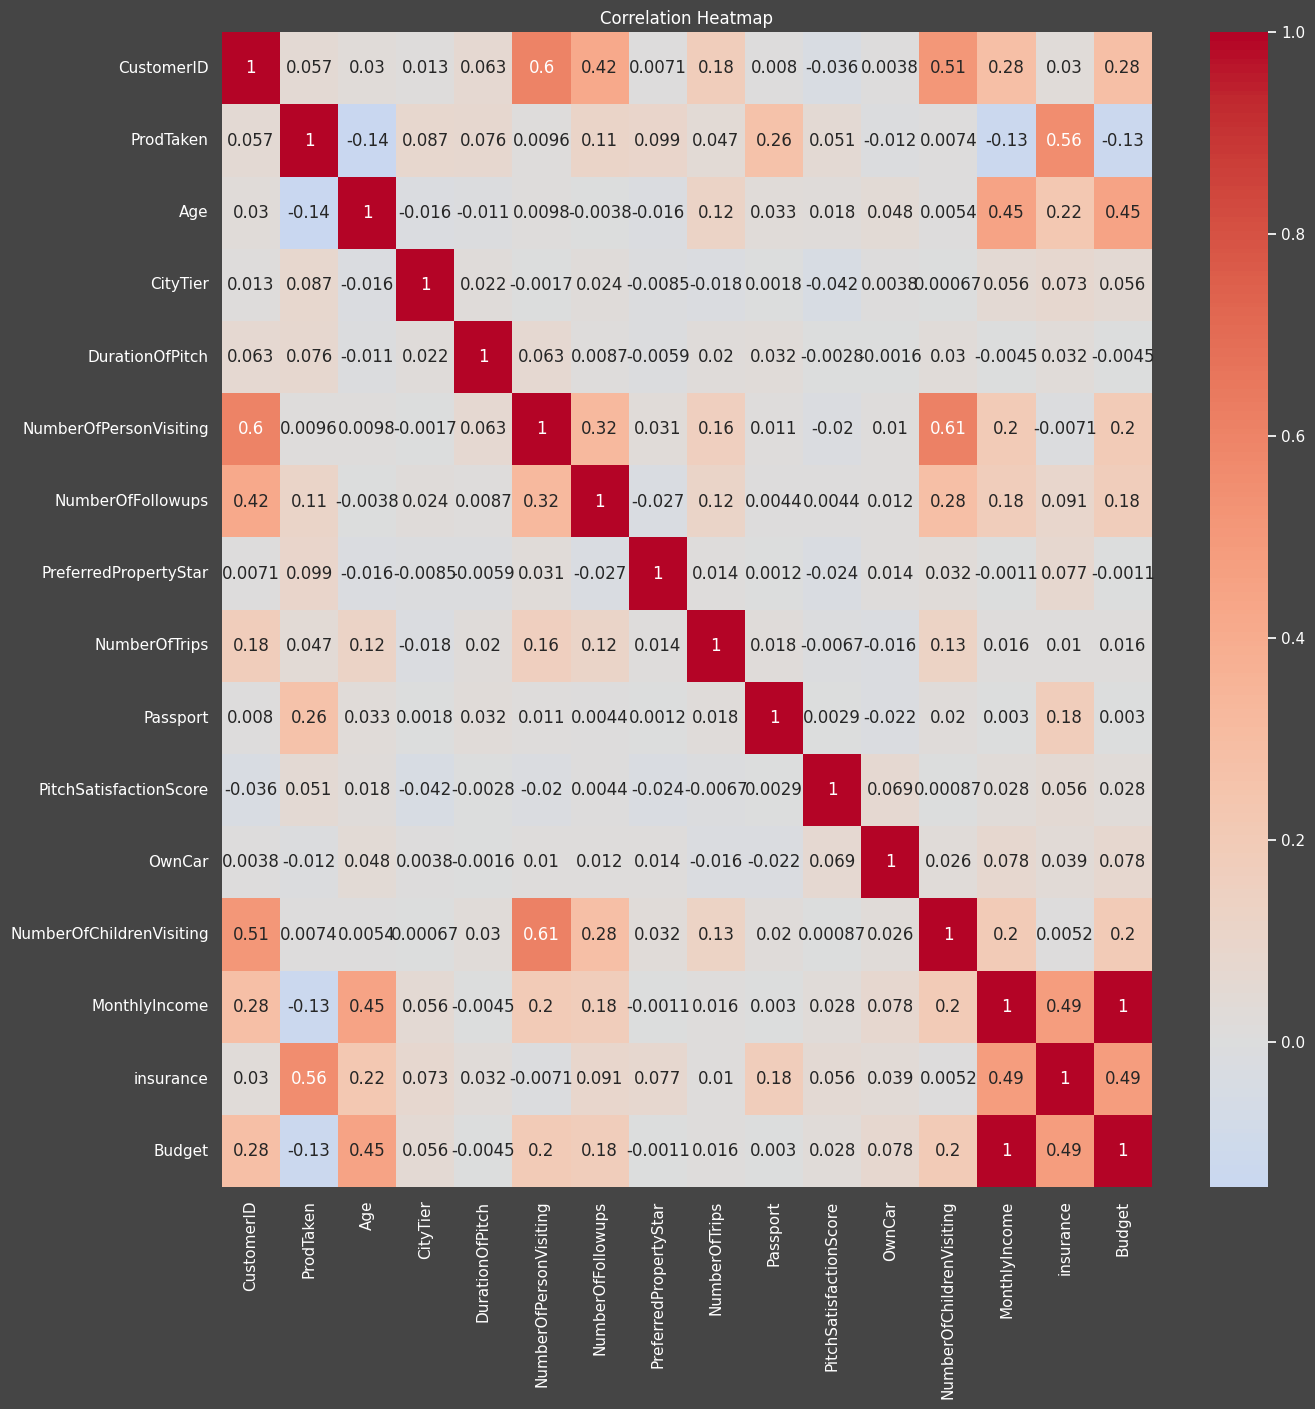

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

## **Univariate Analysis**


### In Univariate Analaysis we will be analysing all the columns, and drawing insights from them.

### **CustomerId**

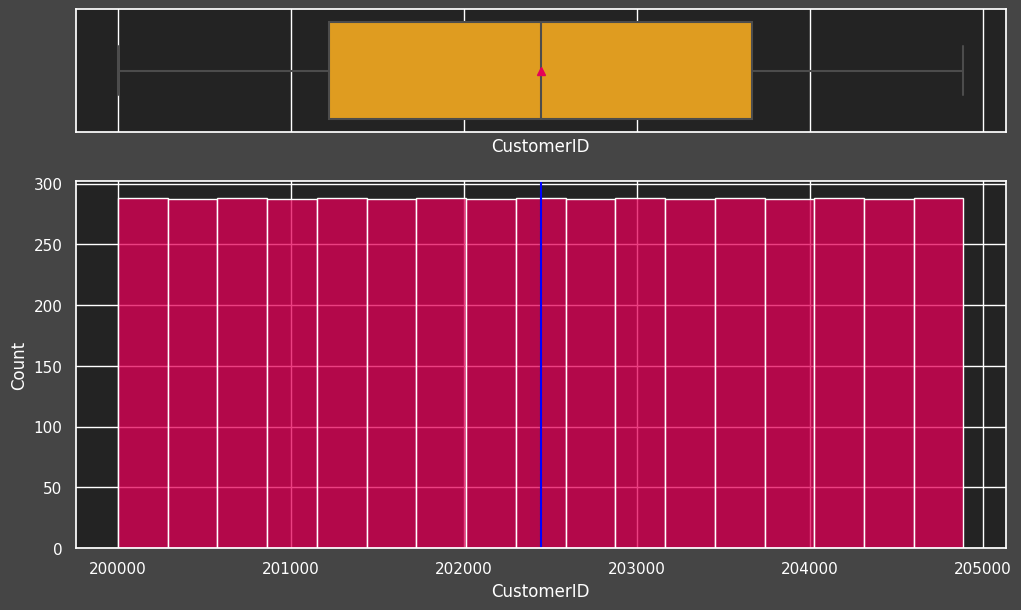

In [ ]:
histogram_boxplot(df,"CustomerID")


In [ ]:
#@title Observations
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Observations</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					CustomerID showcases balanced data as it serves as the primary key in our dataset.
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; padding: 16px;">2.</td>
				<td style="font-family: consolas; padding: 16px;">
					CutomerID is only for identifying the customer record.
				</td>
			</tr>

		</tbody>
	</table>
</div>


S.No,Observations
1.,CustomerID showcases balanced data as it serves as the primary key in our dataset.
2.,CutomerID is only for identifying the customer record.


##Pie Chart

In [ ]:
# Count the number of employees in each designation
designation_counts = df['Designation'].value_counts().reset_index()
designation_counts.columns = ['Designation', 'Count']
designation_counts

,Designation,Count
0,Executive,1842
1,Manager,1732
2,Senior Manager,742
3,AVP,342
4,VP,230


In [ ]:
import plotly.express as px

In [ ]:
# Create a pie chart using Plotly
fig = px.pie(designation_counts, values='Count', names='Designation', title='Distribution of Designations')

# Show the pie chart
fig.show()

In [ ]:
#@title Observations
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Observations</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					Maximum customers were Executives and Managers . So they are our potential customers for the company.
				</td>
			</tr>


		</tbody>
	</table>
</div>


S.No,Observations
1.,Maximum customers were Executives and Managers . So they are our potential customers for the company.


### **Age**

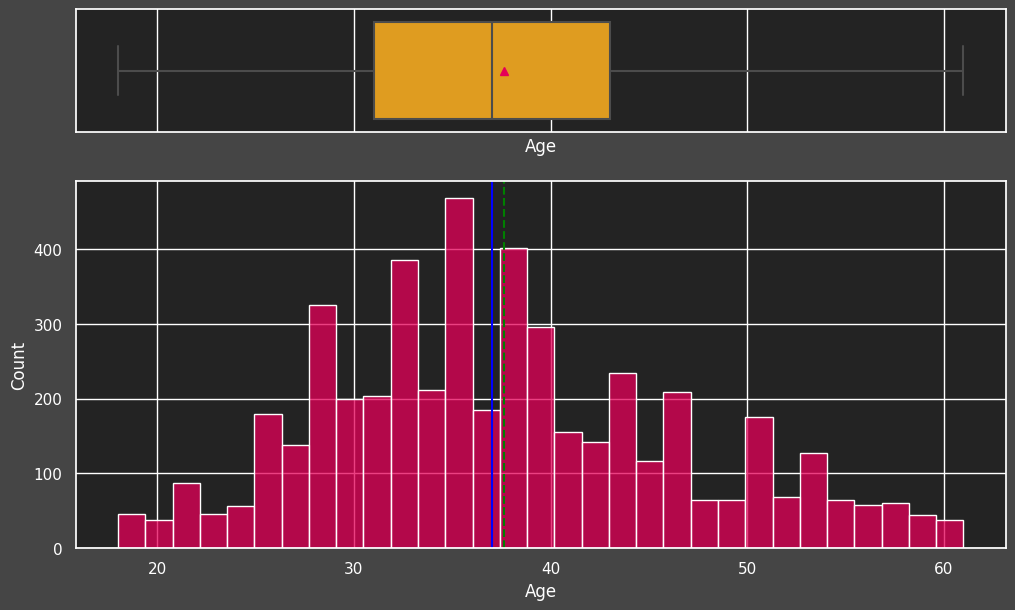

In [ ]:
# use the defined function histogram_boxplot to plot the graphs
histogram_boxplot(df,"Age")

In [ ]:
#@title Observations
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Observations</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					Age variable is almost normally distributed with no outliers.
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; padding: 16px;">2.</td>
				<td style="font-family: consolas; padding: 16px;">
					we can observe  that most customers are in the age brackets 30- 45 yrs.
				</td>
			</tr>
		</tbody>
	</table>
</div>


S.No,Observations
1.,Age variable is almost normally distributed with no outliers.
2.,we can observe that most customers are in the age brackets 30- 45 yrs.


**Observations:**

Age variable is almost normally distributed with no outliers. we see that most customers are in the age brackets 30- 45 yrs.

### **ProdTaken**

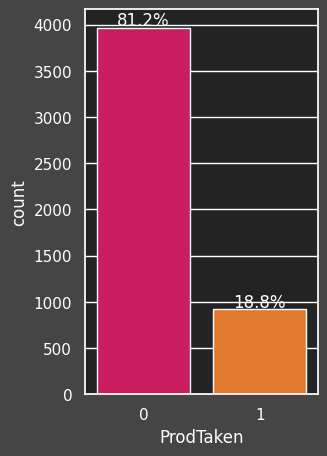

In [ ]:
# use label_barplot function to plot the graph
labeled_barplot(df,"ProdTaken", True, False)

In [ ]:
#@title Insight
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Insight</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					81.2% of the people, dont take the product
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; padding: 16px;">2.</td>
				<td style="font-family: consolas; padding: 16px;">
					The Product has been taken by only 18.8%
				</td>
			</tr>
		</tbody>
	</table>
</div>


S.No,Insight
1.,"81.2% of the people, dont take the product"
2.,The Product has been taken by only 18.8%


### **TypeOfContact**

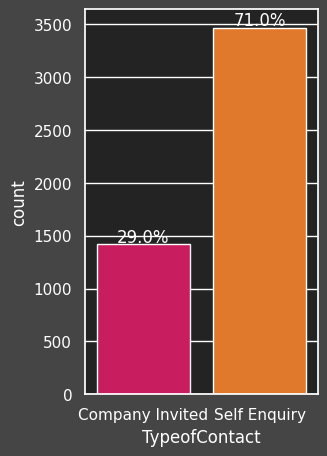

In [ ]:
# use label_barplot function to plot the graph
labeled_barplot(df,"TypeofContact",True,False)

In [ ]:
#@title Insight
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Insight</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					Self-Enquiry is the most preferred contact method by 71% of  customers
				</td>
			</tr>

		</tbody>
	</table>
</div>


S.No,Insight
1.,Self-Enquiry is the most preferred contact method by 71% of customers


### **CityTier**

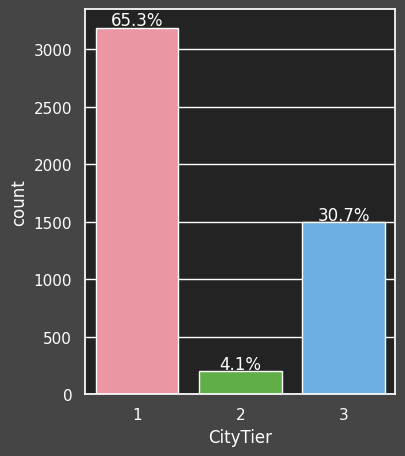

In [ ]:
# use label_barplot function to plot the graph
labeled_barplot(df,"CityTier",True,False)

In [ ]:
#@title Observations
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Observation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					65.3% of customers are from Tier 1 cities and Tier3 cities customer's 30.7%.
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; padding: 16px;">2.</td>
				<td style="font-family: consolas; padding: 16px;">
					Minimum Customer come from tier 2.
				</td>
			</tr>

		</tbody>
	</table>
</div>


S.No,Observation
1.,65.3% of customers are from Tier 1 cities and Tier3 cities customer's 30.7%.
2.,Minimum Customer come from tier 2.


### **DurationOfPitch**

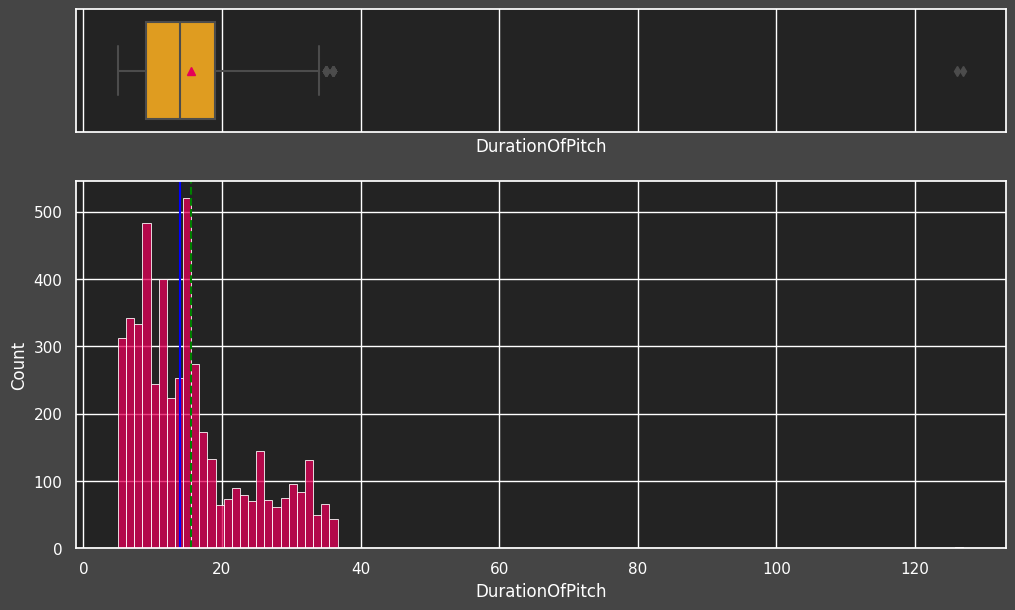

In [ ]:
# use the defined function histogram_boxplot to plot the graphs
histogram_boxplot(df,"DurationOfPitch")

In [ ]:
#@title Observations
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Observations</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					The Duration of Pitch is Positively Skewed
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; padding: 16px;">2.</td>
				<td style="font-family: consolas; padding: 16px;">
					There are few outliers after 40 min
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; padding: 16px;">3.</td>
				<td style="font-family: consolas; padding: 16px;">
					We can observe that most of the Data is highly concentrated before 20 min.

				</td>
			</tr>
		</tbody>
	</table>
</div>


S.No,Observations
1.,The Duration of Pitch is Positively Skewed
2.,There are few outliers after 40 min
3.,We can observe that most of the Data is highly concentrated before 20 min.


### **Occupation**

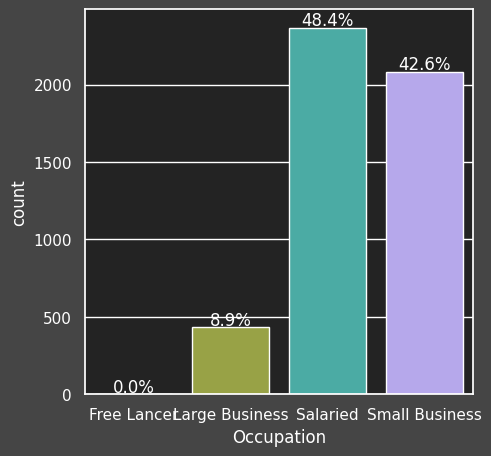

In [ ]:
# use label_barplot function to plot the graph
labeled_barplot(df,"Occupation",True, False)

In [ ]:
#@title Observation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Observation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					Almost 90% of the Customer's were either Salaried or Small Business
				</td>
			</tr>

		</tbody>
	</table>
</div>


S.No,Observation
1.,Almost 90% of the Customer's were either Salaried or Small Business


### **Gender**

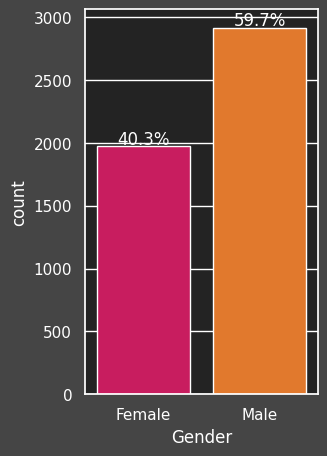

In [ ]:
# use label_barplot function to plot the graph
labeled_barplot(df,"Gender",True, False)

In [ ]:
#@title Observation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Observation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					Number of Male customers are higher than the Female customers
				</td>
			</tr>

		</tbody>
	</table>
</div>


S.No,Observation
1.,Number of Male customers are higher than the Female customers


**Observations:**

Number of Male customers are higher than the Female customers

### **NumberOfPersonVisiting**

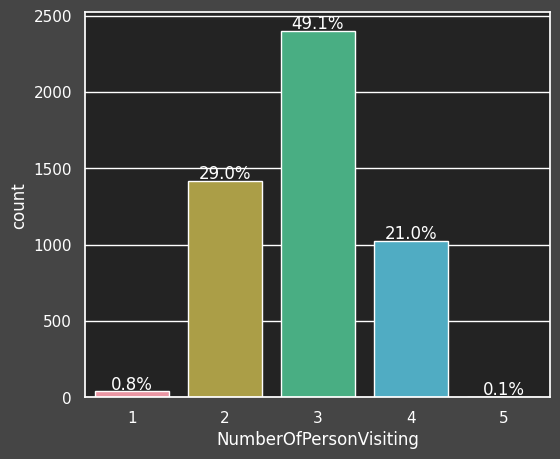

In [ ]:
# use label_barplot function to plot the graph
labeled_barplot(df,"NumberOfPersonVisiting",True, False)

In [ ]:
#@title Observations
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Observations</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					Very few customer's, ie, almost 10% customers either go alone, or take 5 people with them
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; padding: 16px;">2.</td>
				<td style="font-family: consolas; padding: 16px;">
					It is more likely that the  customer took three people with them
				</td>
			</tr>
		</tbody>
	</table>
</div>


S.No,Observations
1.,"Very few customer's, ie, almost 10% customers either go alone, or take 5 people with them"
2.,It is more likely that the customer took three people with them


### **NumberOfFollowups**

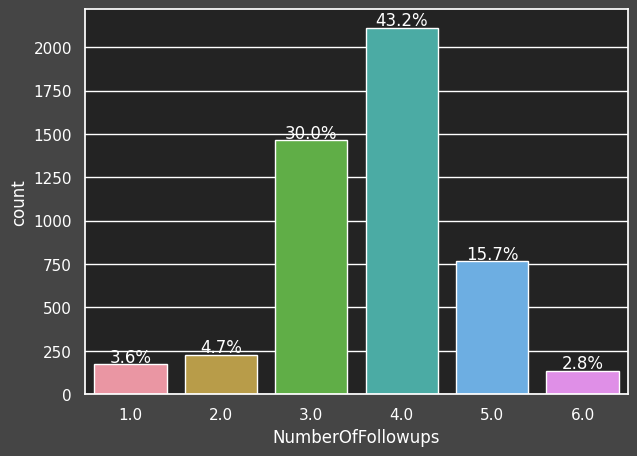

In [ ]:
# use label_barplot function to plot the graph
labeled_barplot(df,"NumberOfFollowups",True, False)

In [ ]:
#@title Observations
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Observations</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					 43.2 % customers had 4 followups.
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; padding: 16px;">2.</td>
				<td style="font-family: consolas; padding: 16px;">
					30% customers  have 3 followups
				</td>
			</tr>
		</tbody>
	</table>
</div>


S.No,Observations
1.,43.2 % customers had 4 followups.
2.,30% customers have 3 followups


### **ProductPitched**

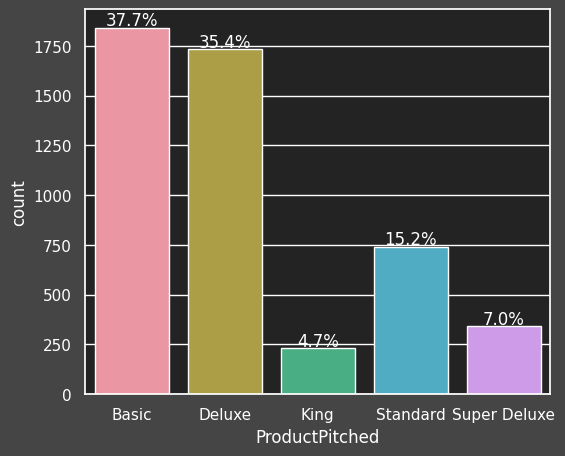

In [ ]:
# use label_barplot function to plot the graph
labeled_barplot(df,"ProductPitched",True, False)

In [ ]:
#@title Observations
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Observations</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					Basic and Deluxe are more often pitched Products
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					King and Super Deluxe are less often pitched products
				</td>
			</tr>
		</tbody>
	</table>
</div>


S.No,Observations
1.,Basic and Deluxe are more often pitched Products
1.,King and Super Deluxe are less often pitched products


### **PreferredPropertyStar**

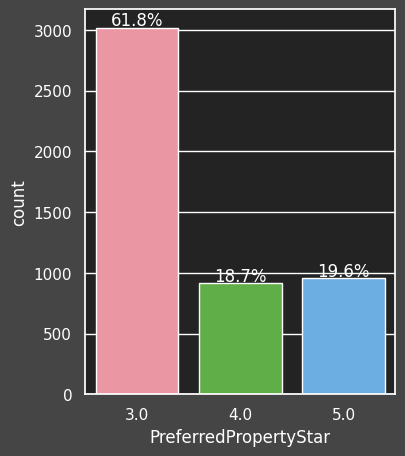

In [ ]:
# use label_barplot function to plot the graph
labeled_barplot(df,"PreferredPropertyStar",True, False)

In [ ]:
#@title Obsrvation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Observation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					65.3% of customers prefer 3 start property.
				</td>
			</tr>

		</tbody>
	</table>
</div>


S.No,Observation
1.,65.3% of customers prefer 3 start property.


### **MaritalStatus**

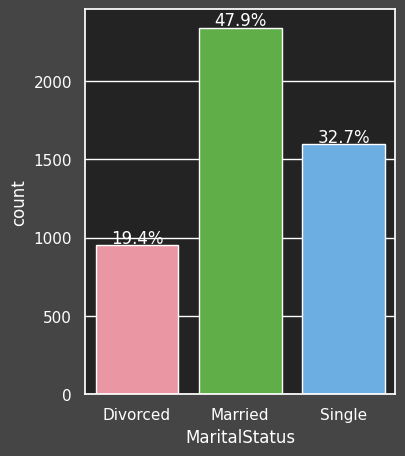

In [ ]:
# use label_barplot function to plot the graph
labeled_barplot(df,"MaritalStatus",True, False)

In [ ]:
#@title Observation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Observation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					47.9 % of the Customer are Maried
				</td>
			</tr>

		</tbody>
	</table>
</div>


S.No,Observation
1.,47.9 % of the Customer are Maried


### **NumberOfTrips**

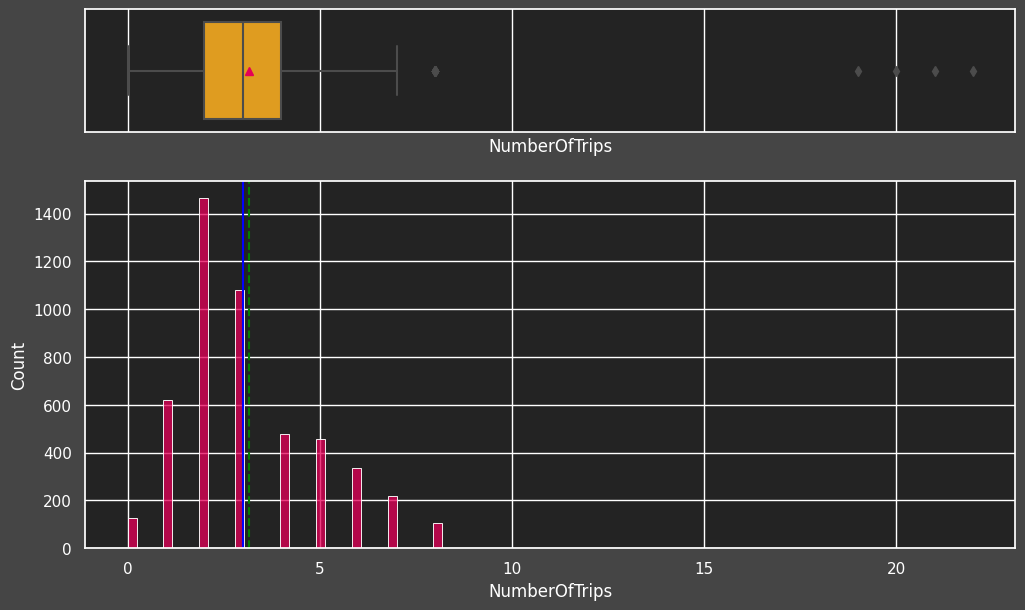

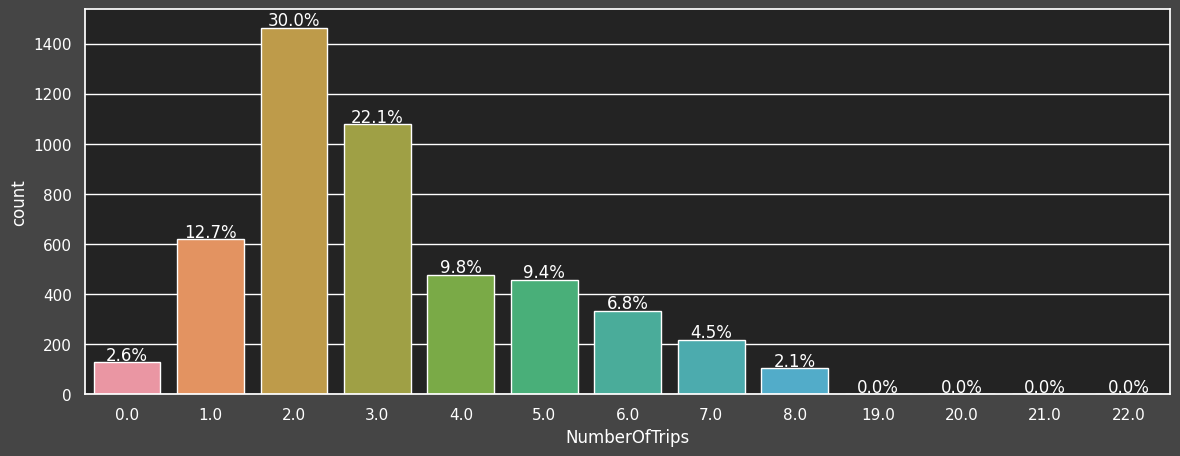

In [ ]:
# use the defined function histogram_boxplot to plot the graphs
histogram_boxplot(df,"NumberOfTrips")

# use label_barplot function to plot the graph
labeled_barplot(df,"NumberOfTrips",True, False)

In [ ]:
#@title Observations
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Observations</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					NumberofTrips is right-skewed a little and majority of the customers seem to take at least 2 trips per year.
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; padding: 16px;">2.</td>
				<td style="font-family: consolas; padding: 16px;">
					We also see very few outliers in the higher end.
				</td>
			</tr>
		</tbody>
	</table>
</div>


S.No,Observations
1.,NumberofTrips is right-skewed a little and majority of the customers seem to take at least 2 trips per year.
2.,We also see very few outliers in the higher end.


### **Passport**

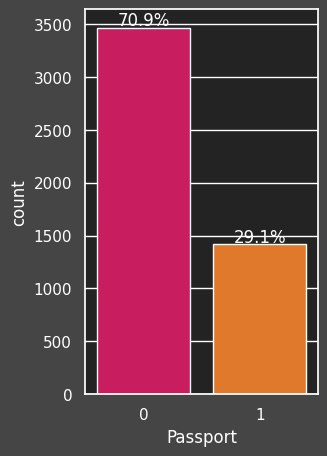

In [ ]:

labeled_barplot(df,"Passport",True, False)

In [ ]:
#@title Observations
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Observation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					70.9% of the customers dont have Passport
				</td>
			</tr>

		</tbody>
	</table>
</div>


S.No,Observation
1.,70.9% of the customers dont have Passport


### **PitchSatisfactionScore**

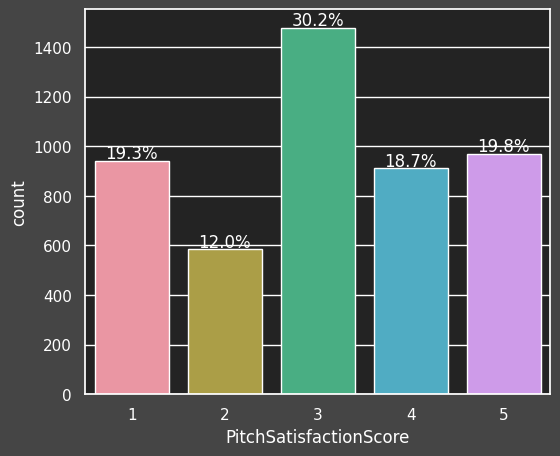

In [ ]:
labeled_barplot(df,"PitchSatisfactionScore",True, False)

In [ ]:
#@title Observations
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Observations</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					Only 30.2% of customers rated the sales
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; padding: 16px;">2.</td>
				<td style="font-family: consolas; padding: 16px;">
					Even though 18.7% customers rated at 4.
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; padding: 16px;">3.</td>
				<td style="font-family: consolas; padding: 16px;">
					19.8% rated a pitch score of 5.
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; padding: 16px;">4.</td>
				<td style="font-family: consolas; padding: 16px;">
					we also see that 19.3% rated the Sales pitch score at 1.
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; padding: 16px;">5.</td>
				<td style="font-family: consolas; padding: 16px;">
					This shows a need for improvement in this area.
				</td>
			</tr>
		</tbody>
	</table>
</div>


S.No,Observations
1.,Only 30.2% of customers rated the sales
2.,Even though 18.7% customers rated at 4.
3.,19.8% rated a pitch score of 5.
4.,we also see that 19.3% rated the Sales pitch score at 1.
5.,This shows a need for improvement in this area.


### **OwnCar**

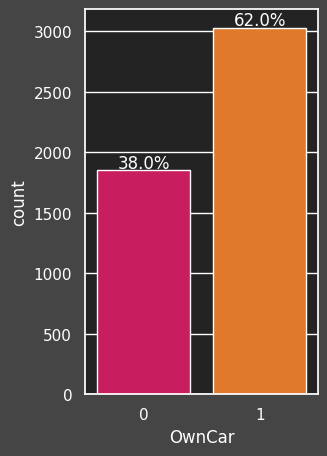

In [ ]:
labeled_barplot(df,"OwnCar",True, False)

In [ ]:
#@title Observation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Observation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					62 % of the Customers have their own car.
				</td>
			</tr>

		</tbody>
	</table>
</div>


S.No,Observation
1.,62 % of the Customers have their own car.


### **NumberOfChildrenVisiting**

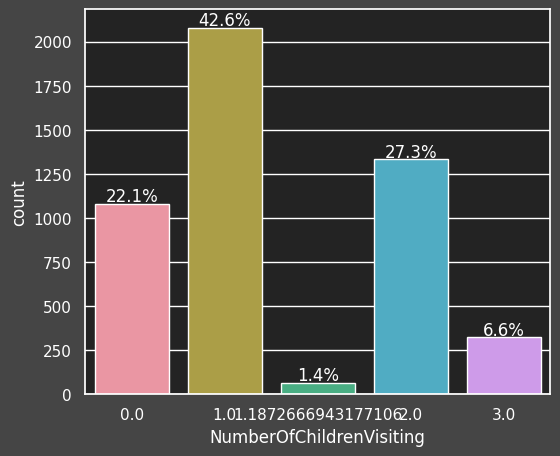

In [ ]:
# use label_barplot function to plot the graph
labeled_barplot(df,"NumberOfChildrenVisiting",True, False)

In [ ]:
#@title Observation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Observations</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					42.6 % of the customer bring 1 children with them
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; padding: 16px;">2.</td>
				<td style="font-family: consolas; padding: 16px;">
					22.1 % of the customer dont bring childrem with them
				</td>
			</tr>
		</tbody>
	</table>
</div>


S.No,Observations
1.,42.6 % of the customer bring 1 children with them
2.,22.1 % of the customer dont bring childrem with them


### **Designation**

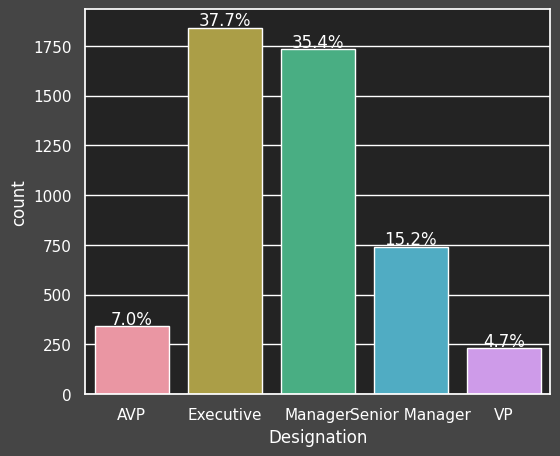

In [ ]:
labeled_barplot(df,"Designation",True, False)

In [ ]:
#@title Observations
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Observation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					Executive (37.7%) and Manager(35.4%) are the highest Designations of the customers in the dataset.
				</td>
			</tr>

		</tbody>
	</table>
</div>


S.No,Observation
1.,Executive (37.7%) and Manager(35.4%) are the highest Designations of the customers in the dataset.


### **MonthlyIncome**

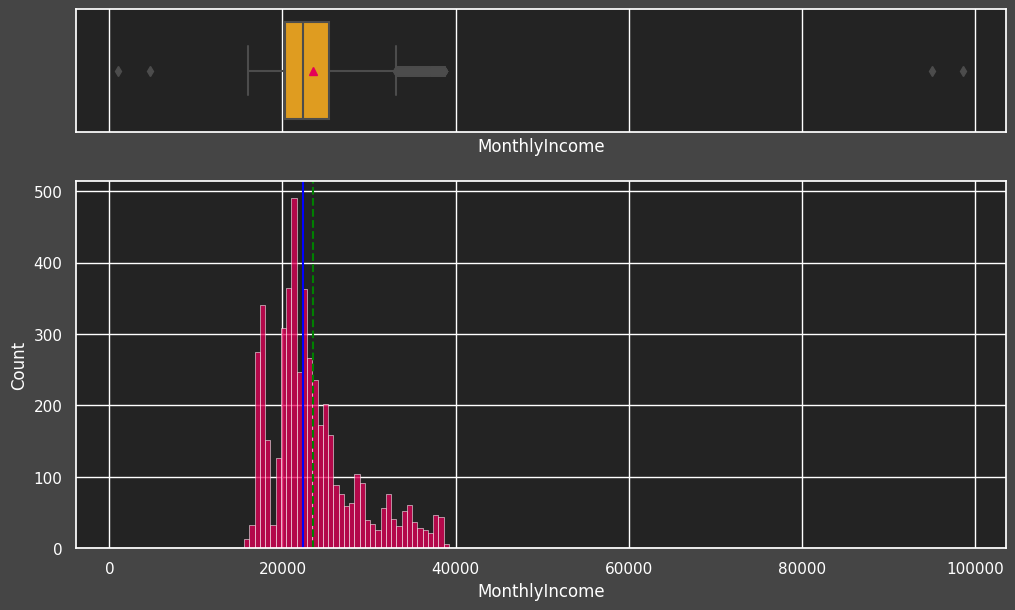

In [ ]:
# use the defined function histogram_boxplot to plot the graphs
histogram_boxplot(df,"MonthlyIncome")

In [ ]:
#@title Observations
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Observations</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					MonthlyIncome is positively-skewed
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; padding: 16px;">2.</td>
				<td style="font-family: consolas; padding: 16px;">
					The majority of customers lie between the income bracket 20K and 3oK rupees.
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; padding: 16px;">3.</td>
				<td style="font-family: consolas; padding: 16px;">
					We also observe two outliers in the low end and above the upper whisker.
				</td>
			</tr>
		</tbody>
	</table>
</div>


S.No,Observations
1.,MonthlyIncome is positively-skewed
2.,The majority of customers lie between the income bracket 20K and 3oK rupees.
3.,We also observe two outliers in the low end and above the upper whisker.


### **Insurance**

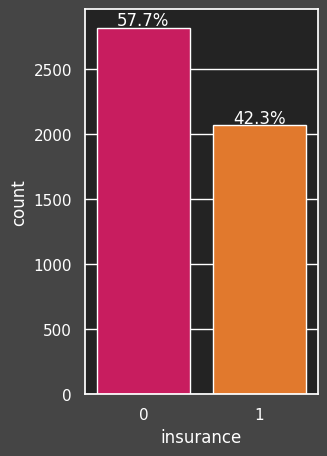

In [ ]:
labeled_barplot(df,"insurance",True, False)

In [ ]:
#@title Observation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Obeservation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					57.7% of the customers don't have insurance with them i.e around 2820 customers.
				</td>
			</tr>

		</tbody>
	</table>
</div>


S.No,Obeservation
1.,57.7% of the customers don't have insurance with them i.e around 2820 customers.


# Bivariate Analysis

### Age vs NumberOfTrips

In [ ]:
# df_plt1.set_index('Age').head(50).plot(kind='bar',figsize=(10,20))
import plotly.express as px
import plotly.graph_objects as go

# colors = custom_color_scale(df['Age'],custom_colors[0], custom_colors[1])
fig = px.histogram(df,x='Age',y='NumberOfTrips',color_discrete_sequence=[custom_colors[0]])
# fig.add_traces(px.scatter(df_plt2))
fig.show()

In [ ]:
#@title Observation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Obeservation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					We can see that it is a normal distribution and the highest is the customers at age 38
				</td>
			</tr>

		</tbody>
	</table>
</div>


S.No,Obeservation
1.,We can see that it is a normal distribution and the highest is the customers at age 38


Product Pitched Vs City Tier

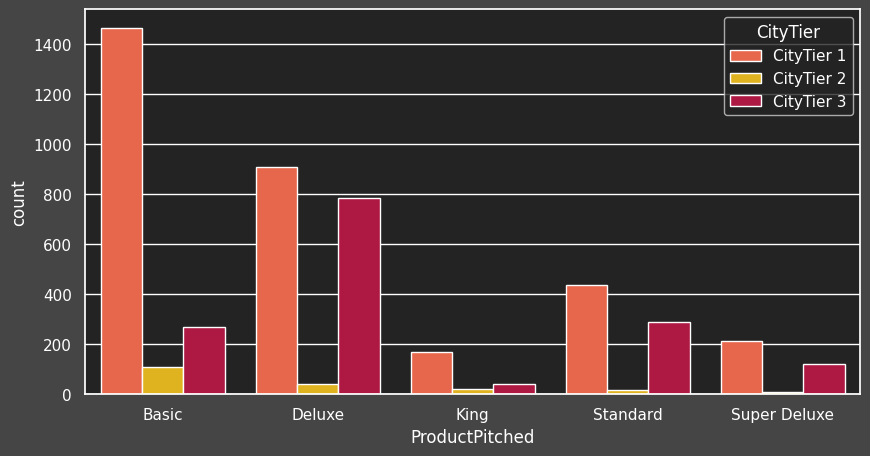

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette
custom_palette = ["#FF5733", "#FFC300", "#C70039"]

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="ProductPitched", hue="CityTier", palette=custom_palette)
plt.legend(title="CityTier", labels=["CityTier 1", "CityTier 2", "CityTier 3"])
plt.show()



In [ ]:
#@title Observation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Obeservation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					Deluxe packages are most favored by Tier 3 followed by Tier 1 city residents.
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">2.</td>
				<td style="font-family: consolas; padding: 16px;">
					Basic packages were most favored by customers from Tier 1 city.
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">3.</td>
				<td style="font-family: consolas; padding: 16px;">
					Standard to King packages are most favored by Tier 1 and 3 city residents.
				</td>
			</tr>

		</tbody>
	</table>
</div>


S.No,Obeservation
1.,Deluxe packages are most favored by Tier 3 followed by Tier 1 city residents.
2.,Basic packages were most favored by customers from Tier 1 city.
3.,Standard to King packages are most favored by Tier 1 and 3 city residents.


### CityTier vs MonthlyIncome

In [ ]:
colors = custom_color_scale(df['CityTier'],custom_colors[0], custom_colors[1])
fig = px.box(df,x='CityTier',y="MonthlyIncome",color='CityTier')
fig.show()

In [ ]:
#@title Observation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Obeservation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
					The Monthly income of customers in all the City Tier range from 15k to 35k. However it has some outliers where the income is below 15k and above 35k
				</td>
			</tr>

		</tbody>
	</table>
</div>


S.No,Obeservation
1.,The Monthly income of customers in all the City Tier range from 15k to 35k. However it has some outliers where the income is below 15k and above 35k


### ProductPitched vs DurationOfPitch

In [ ]:
fig = px.box(df,x='ProductPitched',y="DurationOfPitch",color='ProductPitched')
fig.show()

In [ ]:
#@title Observation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Obeservation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
           Median for all the packages offered ranges with [11,14].
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">2.</td>
				<td style="font-family: consolas; padding: 16px;">
           Duration of pitch for Basic ,Deluxe ,King witnessed few outliers which are not really the outliers as they are very close to the upper whisker.
				</td>
			</tr>

		</tbody>
	</table>
</div>


S.No,Obeservation
1.,"Median for all the packages offered ranges with [11,14]."
2.,"Duration of pitch for Basic ,Deluxe ,King witnessed few outliers which are not really the outliers as they are very close to the upper whisker."


### Age vs Product Pitched

#### Age Distribution when the Product is Basic

In [ ]:
df_basic = df[df['ProductPitched']=='Basic']
age_count = pd.DataFrame(df_basic['Age'].value_counts())
age_count.reset_index(inplace=True)

In [ ]:
fig = px.bar(age_count,x='index',y='Age',title='Age vs Product Pitched  (Basic)',color_discrete_sequence=[custom_colors[0]])
fig.update_layout(
    xaxis_title='Age',  # X-axis label
    yaxis_title='Count'       # Y-axis label
)

In [ ]:
#@title Observation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Obeservation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;"> Basic product is primarily aimed at individuals aged between 20 and 40, with 38 being the highest among these.

				</td>
			</tr>

		</tbody>
	</table>
</div>


S.No,Obeservation
1.,"Basic product is primarily aimed at individuals aged between 20 and 40, with 38 being the highest among these."


#### Age Distribution when the Product is Deluxe

In [ ]:
df['ProductPitched'].value_counts()

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

In [ ]:
df_basic = df[df['ProductPitched']=='Deluxe']
age_count = pd.DataFrame(df_basic['Age'].value_counts())
age_count.reset_index(inplace=True)

In [ ]:
fig = px.bar(age_count,x='index',y='Age',title='Age vs Product Pitched  (Deluxe)',color_discrete_sequence=[custom_colors[0]])
fig.update_layout(
    xaxis_title='Age',  # X-axis label
    yaxis_title='Count'       # Y-axis label
)

In [ ]:
#@title Observation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Obeservation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;"> Deluxe Product is not pitched to customer's below the Age of 25

				</td>

			</tr>
      <tr>
        				<td style="font-family: consolas; font-size:14px; padding: 16px;">2.</td>
				<td style="font-family: consolas; padding: 16px;"> Deluxe product is primarily aimed at individuals aged between 25 and 60, with 36 being the highest among these.

				</td>
      </tr>

		</tbody>
	</table>
</div>


S.No,Obeservation
1.,Deluxe Product is not pitched to customer's below the Age of 25
2.,"Deluxe product is primarily aimed at individuals aged between 25 and 60, with 36 being the highest among these."


#### Age Distribution when the Product is Standard

In [ ]:
df_basic = df[df['ProductPitched']=='Standard']
age_count = pd.DataFrame(df_basic['Age'].value_counts())
age_count.reset_index(inplace=True)

In [ ]:
fig = px.bar(age_count,x='index',y='Age',title='Age vs Product Pitched  (Standard)',color_discrete_sequence=[custom_colors[0]])
fig.update_layout(
    xaxis_title='Age',  # X-axis label
    yaxis_title='Count'       # Y-axis label
)

In [ ]:
#@title Observation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Obeservation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;"> Standard Product is not pitched to customer's below the Age of 25

				</td>

			</tr>
      <tr>
        				<td style="font-family: consolas; font-size:14px; padding: 16px;">2.</td>
				<td style="font-family: consolas; padding: 16px;"> Standard product is primarily aimed at individuals aged between 25 and 60, with 36 being the highest among these.

				</td>
      </tr>

		</tbody>
	</table>
</div>


S.No,Obeservation
1.,Standard Product is not pitched to customer's below the Age of 25
2.,"Standard product is primarily aimed at individuals aged between 25 and 60, with 36 being the highest among these."


#### Age Distribution when the Product is Super Deluxe


In [ ]:
df_basic = df[df['ProductPitched']=='Super Deluxe']
age_count = pd.DataFrame(df_basic['Age'].value_counts())
age_count.reset_index(inplace=True)

In [ ]:
fig = px.bar(age_count,x='index',y='Age',title='Age vs Product Pitched  (Super Deluxe)',color_discrete_sequence=[custom_colors[0]])
fig.update_layout(
    xaxis_title='Age',  # X-axis label
    yaxis_title='Count'       # Y-axis label
)

In [ ]:
#@title Observation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Obeservation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;"> Super Deluxe Product is not pitched to customer's aged between 35 and 39

				</td>

			</tr>
      <tr>
        				<td style="font-family: consolas; font-size:14px; padding: 16px;">2.</td>
				<td style="font-family: consolas; padding: 16px;"> Super Deluxe product is primarily aimed at individuals aged between 40 and 60, with 53 being the highest among these.

				</td>
      </tr>
		</tbody>
	</table>
</div>


S.No,Obeservation
1.,Super Deluxe Product is not pitched to customer's aged between 35 and 39
2.,"Super Deluxe product is primarily aimed at individuals aged between 40 and 60, with 53 being the highest among these."


#### Age Distribution when the Product is King


In [ ]:
df_basic = df[df['ProductPitched']=='King']
age_count = pd.DataFrame(df_basic['Age'].value_counts())
age_count.reset_index(inplace=True)

In [ ]:
fig = px.bar(age_count,x='index',y='Age',title='Age vs Product Pitched  (King)',color_discrete_sequence=[custom_colors[0]])
fig.update_layout(
    xaxis_title='Age',  # X-axis label
    yaxis_title='Count'       # Y-axis label
)

In [ ]:
#@title Observation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Obeservation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;"> King Product is not pitched to customer's aged below 39

				</td>

			</tr>
      <tr>
        				<td style="font-family: consolas; font-size:14px; padding: 16px;">2.</td>
				<td style="font-family: consolas; padding: 16px;"> King product is primarily aimed at individuals aged between 40 and 60, with 50 being the highest among these.

				</td>
      </tr>
		</tbody>
	</table>
</div>


S.No,Obeservation
1.,King Product is not pitched to customer's aged below 39
2.,"King product is primarily aimed at individuals aged between 40 and 60, with 50 being the highest among these."


### NumberOfPersonVisiting vs NumberOfChildrenVisiting

In [ ]:
fig = px.scatter(df,x='NumberOfPersonVisiting',y='NumberOfChildrenVisiting',trendline='ols',color='NumberOfPersonVisiting')
fig.show()

In [ ]:
#@title Observation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Obeservation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
          There exists a positive correlation between the Number of people visiting vs Number of children .
				</td>
			</tr>

		</tbody>
	</table>
</div>


S.No,Obeservation
1.,There exists a positive correlation between the Number of people visiting vs Number of children .


### Budget vs ProductPiched

Label Encoding : As the product pitched is a string and plotly throwns an error.

In [ ]:
df['ProductPitched'].unique()

array(['Basic', 'Deluxe', 'King', 'Standard', 'Super Deluxe'],
      dtype=object)

In [ ]:

#label encoding on ProductPitched
label = LabelEncoder()
df['ProductPitched'] = label.fit_transform(df['ProductPitched'])
df

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,insurance,TypeofContact,Budget
2443,202443,1,35.0,1,13.0,Salaried,Male,3,3.0,0,...,2.0,1,3,1,1.000000,Executive,20363.0,1,Self Enquiry,6108.9
2480,202480,1,51.0,3,10.0,Small Business,Male,3,5.0,0,...,3.0,1,4,0,1.000000,Executive,21361.0,1,Self Enquiry,6408.3
2481,202481,0,36.0,3,9.0,Small Business,Female,4,4.0,0,...,3.0,0,2,1,1.000000,Executive,20692.0,0,Self Enquiry,6207.6
2482,202482,0,37.0,1,12.0,Salaried,Female,3,5.0,0,...,2.0,1,2,1,1.000000,Executive,98678.0,0,Self Enquiry,29603.4
2484,202484,0,36.0,1,11.0,Salaried,Male,4,4.0,0,...,3.0,0,4,0,1.000000,Executive,20629.0,0,Self Enquiry,6188.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,203282,1,43.0,3,19.0,Salaried,Male,3,4.0,4,...,2.0,1,5,1,2.000000,AVP,32436.0,1,Company Invited,9730.8
4315,204315,0,57.0,3,13.0,Salaried,Female,3,2.0,4,...,2.0,0,3,1,1.000000,AVP,31890.0,1,Company Invited,9567.0
3712,203712,0,54.0,1,7.0,Small Business,Female,3,5.0,4,...,6.0,1,1,0,1.000000,AVP,31643.0,1,Company Invited,9492.9
4322,204322,0,53.0,1,11.0,Salaried,Female,2,4.0,4,...,4.0,0,5,1,1.187267,AVP,35233.0,1,Self Enquiry,10569.9




*   0 = basic
*   1 = deluxe


*   2 = king

*   3 = standard


*    4 = super deluxe










In [ ]:
fig = px.scatter(df,x='Budget',y='ProductPitched',trendline='ols',color='Budget')
fig.show()

In [ ]:
#@title Observation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Obeservation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
          For all the Products pitched in the past the maximum Budget of the customer is around 10k to 11k.
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">2.</td>
				<td style="font-family: consolas; padding: 16px;">
          For King many customers Budget is around 11k , KING type product is more applealing to our clients.
				</td>
			</tr>
		</tbody>
	</table>
</div>


S.No,Obeservation
1.,For all the Products pitched in the past the maximum Budget of the customer is around 10k to 11k.
2.,"For King many customers Budget is around 11k , KING type product is more applealing to our clients."


###NumberOfFollowups vs DurationOfPitch

In [ ]:
fig = px.violin(df,y="DurationOfPitch",x="NumberOfFollowups",color='NumberOfFollowups')
fig.show()

In [ ]:
#@title Observation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Obeservation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
          For all the Number of followups , median of Duration of pitch was ranging from 13 to 14 mins.
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">2.</td>
				<td style="font-family: consolas; padding: 16px;">
          In Number of Followups 3 and 4 we can observe few outliers.
				</td>
			</tr>

		</tbody>
	</table>
</div>


S.No,Obeservation
1.,"For all the Number of followups , median of Duration of pitch was ranging from 13 to 14 mins."
2.,In Number of Followups 3 and 4 we can observe few outliers.


## Distribution Plots

## Violin Plots

### Age Distribution

In [ ]:
fig = px.violin(df,x="Age",color_discrete_sequence=[custom_colors[0]])
fig.show()

In [ ]:
#@title Observation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Obeservation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
          31% of the data (age) is lying below q1.
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">2.</td>
				<td style="font-family: consolas; padding: 16px;">
          Median age of the customer is 37.
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">3.</td>
				<td style="font-family: consolas; padding: 16px;">
          No such outliers the age
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">4.</td>
				<td style="font-family: consolas; padding: 16px;">
          Maximum probability density is assocated with kde:0.998
				</td>
			</tr>

		</tbody>
	</table>
</div>


S.No,Obeservation
1.,31% of the data (age) is lying below q1.
2.,Median age of the customer is 37.
3.,No such outliers the age
4.,Maximum probability density is assocated with kde:0.998


###Designation Distribution

In [ ]:
fig = px.violin(df,x='Designation',color_discrete_sequence=[custom_colors[0]])
fig.show()

In [ ]:
#@title Observation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Obeservation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
          For the Executive we observed the maximum probability density of 0.999.
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">2.</td>
				<td style="font-family: consolas; padding: 16px;">
          In case of manager we saw maximum probability density of 0.94
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">3.</td>
				<td style="font-family: consolas; padding: 16px;">
          For the VP's and AVP's its 0.125 and 0.185 respectively. Means, Very Less customers are designated as VP's.
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">4.</td>
				<td style="font-family: consolas; padding: 16px;">
          Maximum probability density is assocated with kde:0.403 for the senior manager.
				</td>
			</tr>

		</tbody>
	</table>
</div>


S.No,Obeservation
1.,For the Executive we observed the maximum probability density of 0.999.
2.,In case of manager we saw maximum probability density of 0.94
3.,"For the VP's and AVP's its 0.125 and 0.185 respectively. Means, Very Less customers are designated as VP's."
4.,Maximum probability density is assocated with kde:0.403 for the senior manager.


## Label Encoding

In [ ]:
#label encoding on designation
label = LabelEncoder()
df['Designation'] = label.fit_transform(df['Designation'])

#print which encoding given to which column
df['Designation'].unique()

array([1, 2, 4, 3, 0])

Label Encoding

 0 = Avp, 1 = executive, 2 = manager, 3 = Senior maneger, 4 = VP

In [ ]:

df['TypeofContact'].unique()

array(['Self Enquiry', 'Company Invited'], dtype=object)

In [ ]:
# lebel encoding on type of contact
label = LabelEncoder()
df['TypeofContact'] = label.fit_transform(df['TypeofContact'])
df


,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,insurance,TypeofContact,Budget
2443,202443,1,35.0,1,13.0,Salaried,Male,3,3.0,0,...,2.0,1,3,1,1.000000,1,20363.0,1,1,6108.9
2480,202480,1,51.0,3,10.0,Small Business,Male,3,5.0,0,...,3.0,1,4,0,1.000000,1,21361.0,1,1,6408.3
2481,202481,0,36.0,3,9.0,Small Business,Female,4,4.0,0,...,3.0,0,2,1,1.000000,1,20692.0,0,1,6207.6
2482,202482,0,37.0,1,12.0,Salaried,Female,3,5.0,0,...,2.0,1,2,1,1.000000,1,98678.0,0,1,29603.4
2484,202484,0,36.0,1,11.0,Salaried,Male,4,4.0,0,...,3.0,0,4,0,1.000000,1,20629.0,0,1,6188.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,203282,1,43.0,3,19.0,Salaried,Male,3,4.0,4,...,2.0,1,5,1,2.000000,0,32436.0,1,0,9730.8
4315,204315,0,57.0,3,13.0,Salaried,Female,3,2.0,4,...,2.0,0,3,1,1.000000,0,31890.0,1,0,9567.0
3712,203712,0,54.0,1,7.0,Small Business,Female,3,5.0,4,...,6.0,1,1,0,1.000000,0,31643.0,1,0,9492.9
4322,204322,0,53.0,1,11.0,Salaried,Female,2,4.0,4,...,4.0,0,5,1,1.187267,0,35233.0,1,1,10569.9


In [ ]:
df['TypeofContact'].unique()

array([1, 0])



*   0 = company invited
*   1 = self-invited



In [ ]:
df['ProductPitched'].unique()

array([0, 1, 2, 3, 4])

In [ ]:
df['Occupation'].unique()


array(['Salaried', 'Small Business', 'Large Business', 'Free Lancer'],
      dtype=object)

In [ ]:
label = LabelEncoder()
df['Occupation'] = label.fit_transform(df['Occupation'])
df.head()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,insurance,TypeofContact,Budget
2443,202443,1,35.0,1,13.0,2,Male,3,3.0,0,...,2.0,1,3,1,1.0,1,20363.0,1,1,6108.9
2480,202480,1,51.0,3,10.0,3,Male,3,5.0,0,...,3.0,1,4,0,1.0,1,21361.0,1,1,6408.3
2481,202481,0,36.0,3,9.0,3,Female,4,4.0,0,...,3.0,0,2,1,1.0,1,20692.0,0,1,6207.6
2482,202482,0,37.0,1,12.0,2,Female,3,5.0,0,...,2.0,1,2,1,1.0,1,98678.0,0,1,29603.4
2484,202484,0,36.0,1,11.0,2,Male,4,4.0,0,...,3.0,0,4,0,1.0,1,20629.0,0,1,6188.7


In [ ]:
df['Occupation'].unique()

array([2, 3, 1, 0])

Label Encoding Occupation.

*   0 = free lancer
*   1 = large business

*   2 = salaried
*   3 = small business





In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
label = LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender'])
df.head()


,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,insurance,TypeofContact,Budget
2443,202443,1,35.0,1,13.0,2,1,3,3.0,0,...,2.0,1,3,1,1.0,1,20363.0,1,1,6108.9
2480,202480,1,51.0,3,10.0,3,1,3,5.0,0,...,3.0,1,4,0,1.0,1,21361.0,1,1,6408.3
2481,202481,0,36.0,3,9.0,3,0,4,4.0,0,...,3.0,0,2,1,1.0,1,20692.0,0,1,6207.6
2482,202482,0,37.0,1,12.0,2,0,3,5.0,0,...,2.0,1,2,1,1.0,1,98678.0,0,1,29603.4
2484,202484,0,36.0,1,11.0,2,1,4,4.0,0,...,3.0,0,4,0,1.0,1,20629.0,0,1,6188.7


In [ ]:
df['Gender'].unique()

array([1, 0])


Label Encoding for  **Gender**
*    0 = Female
*    1 = Male



## Visualization After Label Encoding

In [ ]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome', 'insurance',
       'TypeofContact', 'Budget'],
      dtype='object')

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

The count plot for ProdTaken will show the distribution of purchased (1) and not purchased (0) travel packages.

The histogram for Age gives an overview of the age distribution of customers.

The box plot of Age by CityTier allows you to see if age varies across different city tiers.

In [ ]:
# Box plot of Age by CityTier
fig = px.box(df, x='CityTier', y='Age', title='Age Distribution by City Tier',color='CityTier')
fig.update_xaxes(title='City Tier')
fig.update_yaxes(title='Age')
fig.show()

In [ ]:
#@title Observation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Obeservation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
          The box plot of Age by CityTier allows you to see if age varies across different city tiers.
				</td>
			</tr>

		</tbody>
	</table>
</div>

S.No,Obeservation
1.,The box plot of Age by CityTier allows you to see if age varies across different city tiers.


In [ ]:
# Age distribution by ProductPitched
fig_age_product = px.box(df, x='ProductPitched', y='Age',
                         title='Age Distribution by Product Pitched',color='ProductPitched')
fig_age_product.show()

In [ ]:
#@title Observation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Obeservation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
          Understanding the age distribution for each product pitched can help tailor products to different age groups.
				</td>
			</tr>

		</tbody>
	</table>
</div>


S.No,Obeservation
1.,Understanding the age distribution for each product pitched can help tailor products to different age groups.


In [ ]:
# Age distribution by PreferredPropertyStar
fig_age_star = px.box(df, x='PreferredPropertyStar', y='Age',
                      title='Age Distribution by Preferred Star Rating',color='PreferredPropertyStar')
fig_age_star.show()

In [ ]:
#@title Observation
%%html
<style>
  html, body {
    margin: 0;
    padding: 0;
  }
  body {
    background: #100c08;
  }
  table {
    width: 100%;
    border-collapse: collapse; /* Add this to collapse table borders */
  }
  thead {
    background: #d80e97 ; /* Change the title background color */
    color: white; /* Change the title text color */
  }
  tbody {
    background: #eed863;
  }
  th, td {
    color: black;
    padding: 10px; /* Increase padding to make the body thicker */
    text-align: left; /* Align text to the left */
    border: 1px solid white; /* Add border to cells for better visibility */
  }
</style>
<div class="container">
	<table>
		<thead>
			<tr>
				<th style="width:10%; font-size:20px; font-family: consolas; border-radius:10px 0 0 0;">S.No</th>
				<th style="font-size:20px; font-family: consolas; border-radius:0 10px 0 0;">Obeservation</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">1.</td>
				<td style="font-family: consolas; padding: 16px;">
          This plot allows us to see if there are age preferences for specific star ratings in preferred properties.
				</td>
			</tr>
      <tr>
				<td style="font-family: consolas; font-size:14px; padding: 16px;">2.</td>
				<td style="font-family: consolas; padding: 16px;">
          Maximum customers prefer 3 and 5 star rating properties.
				</td>
			</tr>

		</tbody>
	</table>
</div>


S.No,Obeservation
1.,This plot allows us to see if there are age preferences for specific star ratings in preferred properties.
2.,Maximum customers prefer 3 and 5 star rating properties.


# **Thank You!**